<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab: Cleaning Rock Song Data

---


<h1>Lab Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Load-rock.csv-and-do-an-initial-examination-of-its-data-columns." data-toc-modified-id="1.-Load-rock.csv-and-do-an-initial-examination-of-its-data-columns.-1">1. Load <code>rock.csv</code> and do an initial examination of its data columns.</a></span></li><li><span><a href="#2.--Clean-up-the-column-names." data-toc-modified-id="2.--Clean-up-the-column-names.-2">2.  Clean up the column names.</a></span></li><li><span><a href="#3.-How-many-missing-values-are-there?" data-toc-modified-id="3.-How-many-missing-values-are-there?-3">3. How many missing values are there?</a></span></li><li><span><a href="#4.-Why-is-the-release-column-coded-as-object-type?-Convert-to-a-more-appropriate-format." data-toc-modified-id="4.-Why-is-the-release-column-coded-as-object-type?-Convert-to-a-more-appropriate-format.-4">4. Why is the release column coded as object type? Convert to a more appropriate format.</a></span></li><li><span><a href="#5.-Obtain-summary-statistics-for-the-converted-release-column." data-toc-modified-id="5.-Obtain-summary-statistics-for-the-converted-release-column.-5">5. Obtain summary statistics for the converted release column.</a></span></li><li><span><a href="#6.-What-is-the-role-of-the-year-column?-How-does-it-relate-to-the-release-year?" data-toc-modified-id="6.-What-is-the-role-of-the-year-column?-How-does-it-relate-to-the-release-year?-6">6. What is the role of the year column? How does it relate to the release year?</a></span></li><li><span><a href="#7.-Plot-the-distributions-of-the-release-year,-playcount-and-fg." data-toc-modified-id="7.-Plot-the-distributions-of-the-release-year,-playcount-and-fg.-7">7. Plot the distributions of the release year, playcount and fg.</a></span></li><li><span><a href="#8.-Plot-the-playcount-versus-the-release-year." data-toc-modified-id="8.-Plot-the-playcount-versus-the-release-year.-8">8. Plot the playcount versus the release year.</a></span></li><li><span><a href="#9.-Which-years-have-the-most-releases?" data-toc-modified-id="9.-Which-years-have-the-most-releases?-9">9. Which years have the most releases?</a></span></li><li><span><a href="#10.-Which-records-don't-have-matching-&quot;Play-Count&quot;-corresponding-to-&quot;F*G&quot;?" data-toc-modified-id="10.-Which-records-don't-have-matching-&quot;Play-Count&quot;-corresponding-to-&quot;F*G&quot;?-10">10. Which records don't have matching "Play Count" corresponding to "F*G"?</a></span></li><li><span><a href="#11.-Which-artists-have-the-most-songs?" data-toc-modified-id="11.-Which-artists-have-the-most-songs?-11">11. Which artists have the most songs?</a></span></li><li><span><a href="#Bonus:-Which-artists-have-the-most-playcounts?" data-toc-modified-id="Bonus:-Which-artists-have-the-most-playcounts?-12">Bonus: Which artists have the most playcounts?</a></span></li><li><span><a href="#Bonus:-Which-artists-have-the-most-missing-values-between-each-of-the-variables?" data-toc-modified-id="Bonus:-Which-artists-have-the-most-missing-values-between-each-of-the-variables?-13">Bonus: Which artists have the most missing values between each of the variables?</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### 1. Load `rock.csv` and do an initial examination of its data columns.

In [2]:
# Load the data.
df = pd.read_csv("../../../../../resource-datasets/rock_songs/rock.csv")
df.head()

,Song Clean,ARTIST CLEAN,Release Year,COMBINED,First?,Year?,PlayCount,F*G
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18
4,Art For Arts Sake,10cc,1975,Art For Arts Sake by 10cc,1,1,1,1


In [3]:
# Look at the information regarding its columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 8 columns):
Song Clean      2230 non-null object
ARTIST CLEAN    2230 non-null object
Release Year    1653 non-null object
COMBINED        2230 non-null object
First?          2230 non-null int64
Year?           2230 non-null int64
PlayCount       2230 non-null int64
F*G             2230 non-null int64
dtypes: int64(4), object(4)
memory usage: 139.5+ KB


### 2.  Clean up the column names.

Clean up the column names. Choose one of the methods from the lesson.

In [4]:
rename_map = {
    # Original column: [renamed column]
    'Song Clean':    'song', 
    'ARTIST CLEAN':  'artist', 
    'Release Year':  'release', 
    'COMBINED':      'song_artist', 
    'First?':        'first', 
    'Year?':         'year', 
    'PlayCount':     'playcount', 
    'F*G':           'fg'
}

df.rename(columns=rename_map, inplace=True)
df.head(4)

,song,artist,release,song_artist,first,year,playcount,fg
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18


### 3. How many missing values are there?

Filter the rows containing missing release years using the command `.isnull()` on the release column.

In [5]:
df.isnull().sum()

song             0
artist           0
release        577
song_artist      0
first            0
year             0
playcount        0
fg               0
dtype: int64

In [6]:
df[df['release'].isnull()].head()

,song,artist,release,song_artist,first,year,playcount,fg
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0
10,"Baby, Please Don't Go",AC/DC,NaN,"Baby, Please Don't Go by AC/DC",1,0,1,0
13,CAN'T STOP ROCK'N'ROLL,AC/DC,NaN,CAN'T STOP ROCK'N'ROLL by AC/DC,1,0,5,0
16,Girls Got Rhythm,AC/DC,NaN,Girls Got Rhythm by AC/DC,1,0,24,0
24,Let's Get It Up,AC/DC,NaN,Let's Get It Up by AC/DC,1,0,4,0


### 4. Why is the release column coded as object type? Convert to a more appropriate format.

In [7]:
df.release.unique()

array(['1982', nan, '1981', '1980', '1975', '2000', '2002', '1992',
       '1985', '1993', '1976', '1995', '1979', '1984', '1977', '1990',
       '1986', '1974', '2014', '1987', '1973', '2001', '1989', '1997',
       '1971', '1972', '1994', '1970', '1966', '1965', '1983', '1955',
       '1978', '1969', '1999', '1968', '1988', '1962', '2007', '1967',
       '1958', '1071', '1996', '1991', '2005', '2011', '2004', '2012',
       '2003', '1998', '2008', '1964', '2013', '2006', 'SONGFACTS.COM',
       '1963', '1961'], dtype=object)

In [8]:
def convert_to_float(x):
    try:
        return float(x)
    except:
        print(f'{x} cannot be converted to float')
        return np.nan

In [9]:
df['release_float'] = df['release'].map(convert_to_float)

SONGFACTS.COM cannot be converted to float


### 5. Obtain summary statistics for the converted release column.

What do you notice? What would you suggest to do?

In [10]:
df['release_float'].describe()

count    1652.000000
mean     1978.019976
std        24.191247
min      1071.000000
25%      1971.000000
50%      1977.000000
75%      1984.000000
max      2014.000000
Name: release_float, dtype: float64

In [11]:
df[df['release_float'] < 1950]

,song,artist,release,song_artist,first,year,playcount,fg,release_float
547,Levon,Elton John,1071,Levon by Elton John,1,1,8,8,1071.0


In [12]:
df[df.release=='SONGFACTS.COM']

,song,artist,release,song_artist,first,year,playcount,fg,release_float
1504,Bullfrog Blues,Rory Gallagher,SONGFACTS.COM,Bullfrog Blues by Rory Gallagher,1,1,1,1,NaN


In [13]:
df.loc[1504, 'release_float'] = 1972
df.loc[547, 'release_float'] = 1971

In [14]:
df['release_float'].describe()

count    1653.000000
mean     1978.560799
std         9.307406
min      1955.000000
25%      1971.000000
50%      1977.000000
75%      1984.000000
max      2014.000000
Name: release_float, dtype: float64

### 6. What is the role of the year column? How does it relate to the release year?

In [15]:
df[df.year==0]['release_float'].unique()

array([nan])

In [16]:
df[df.year==1]['release_float'].unique()

array([1982., 1981., 1980., 1975., 2000., 2002., 1992., 1985., 1993.,
       1976., 1995., 1979., 1984., 1977., 1990., 1986., 1974., 2014.,
       1987., 1973., 2001., 1989., 1997., 1971., 1972., 1994., 1970.,
       1966., 1965., 1983., 1955., 1978., 1969., 1999., 1968., 1988.,
       1962., 2007., 1967., 1958., 1996., 1991., 2005., 2011., 2004.,
       2012., 2003., 1998., 2008., 1964., 2013., 2006., 1963., 1961.])

### 7. Plot the distributions of the release year, playcount and fg.

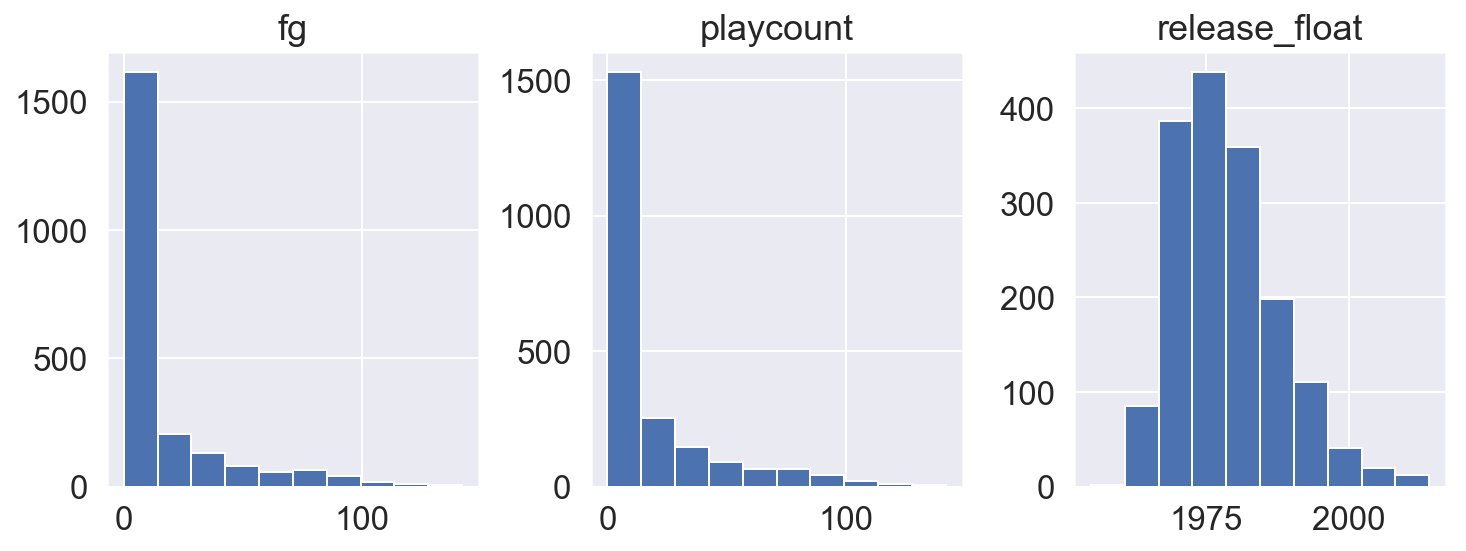

In [17]:
df[['release_float', 'playcount', 'fg']].hist(layout=(1, 3), figsize=(12, 4));

### 8. Plot the playcount versus the release year.

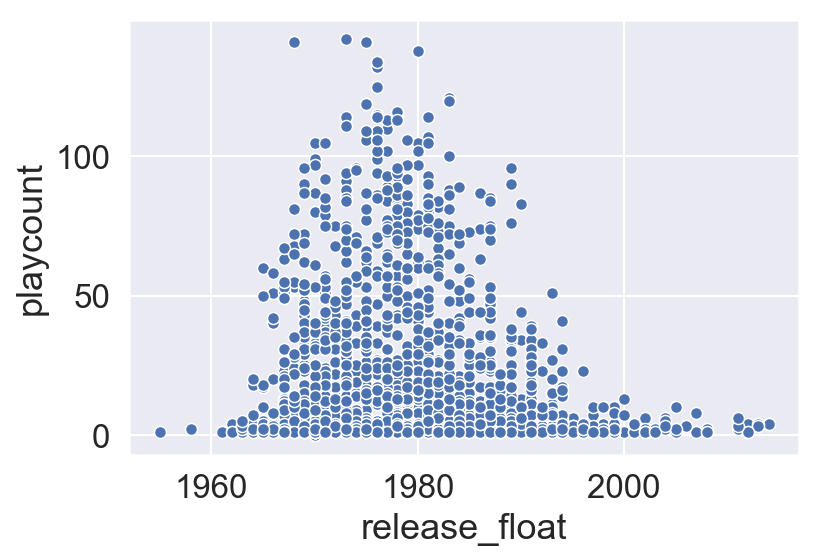

In [18]:
# Using seaborn
sns.scatterplot(x='release_float', y='playcount', data=df);

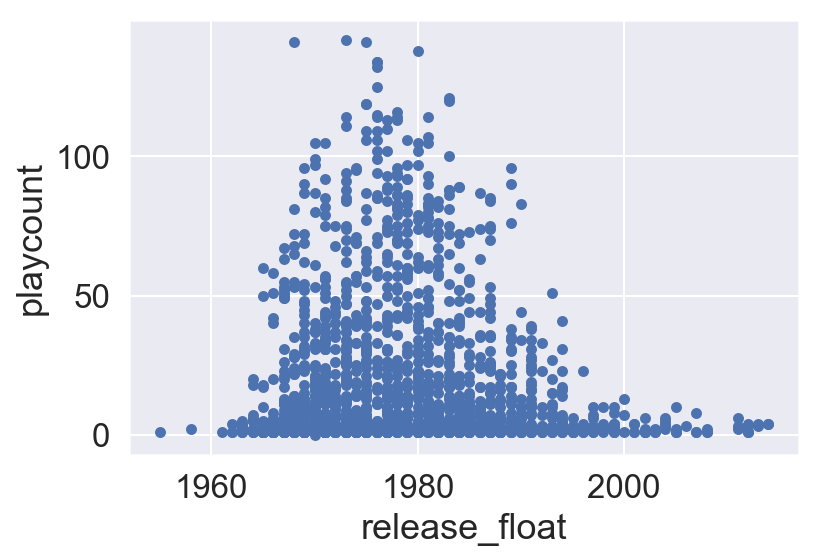

In [19]:
# Using pandas
df.plot(kind='scatter',x='release_float', y='playcount', c='b');

### 9. Which years have the most releases?

In [20]:
df.release_float.value_counts().iloc[:20]

1973.0    104
1977.0     83
1975.0     83
1970.0     81
1971.0     76
1969.0     72
1980.0     70
1978.0     64
1979.0     63
1967.0     61
1981.0     61
1983.0     60
1976.0     56
1982.0     54
1972.0     51
1984.0     51
1974.0     48
1968.0     46
1985.0     39
1987.0     39
Name: release_float, dtype: int64

### 10. Which songs don't have matching "Play Count" corresponding to "F*G"?

In [21]:
df[df.playcount!=df.fg].head()

,song,artist,release,song_artist,first,year,playcount,fg,release_float
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0,NaN
10,"Baby, Please Don't Go",AC/DC,NaN,"Baby, Please Don't Go by AC/DC",1,0,1,0,NaN
13,CAN'T STOP ROCK'N'ROLL,AC/DC,NaN,CAN'T STOP ROCK'N'ROLL by AC/DC,1,0,5,0,NaN
16,Girls Got Rhythm,AC/DC,NaN,Girls Got Rhythm by AC/DC,1,0,24,0,NaN
24,Let's Get It Up,AC/DC,NaN,Let's Get It Up by AC/DC,1,0,4,0,NaN


### 11. Which are the top 10 artists with the most songs?

In [22]:
df['artist'].value_counts()[:10]

The Beatles                      100
Led Zeppelin                      69
Rolling Stones                    55
Van Halen                         44
Pink Floyd                        39
The Who                           31
Aerosmith                         31
Tom Petty & The Heartbreakers     29
AC/DC                             29
Heart                             24
Name: artist, dtype: int64

### Bonus: Which are the top 5 artists with the most playcounts? 

In [23]:
pd.Series({artist: df[df['artist']==artist]['playcount'].sum() 
           for artist in df['artist'].unique()}
         ).sort_values(ascending=False)[:5]

Led Zeppelin                     1556
Van Halen                        1243
Rolling Stones                   1143
Pink Floyd                       1044
Tom Petty & The Heartbreakers     965
dtype: int64

### Bonus: Which artists have the most missing values between each of the variables? 

In [25]:
pd.Series({artist: df[df['artist']==artist].isnull().sum().sum() 
           for artist in df['artist'].unique()}
         ).sort_values(ascending=False)[:20]

Heart                            34
Van Halen                        34
Bob Seger                        22
Paul McCartney & Wings           22
Tom Petty & The Heartbreakers    22
Grateful Dead                    22
Stevie Ray Vaughan               20
Bad Company                      18
The Cars                         18
AC/DC                            18
Steve Miller Band                16
REO Speedwagon                   16
Rolling Stones                   16
Boston                           16
ZZ Top                           14
Eric Clapton                     14
Clarks                           14
The Black Crowes                 14
George Thorogood                 12
The Doobie Brothers              12
dtype: int64

In [29]:
for artist in df['artist'].unique():
    print(df[df['artist']==artist].isnull().sum())

song             0
artist           0
release          1
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    1
dtype: int64
song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          9
song_artist      0
firs

dtype: int64
song             0
artist           0
release          3
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    3
dtype: int64
song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          4
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    4
dtype: int64
song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          7
song_artis

dtype: int64
song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          1
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    1
dtype: int64
song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          1
song_artis

dtype: int64
song             0
artist           0
release          1
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    1
dtype: int64
song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          1
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    1
dtype: int64
song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          5
song_artis

song             0
artist           0
release          2
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    2
dtype: int64
song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          1
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    1
dtype: int64
song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          1
song_artist      0
firs

dtype: int64
song             0
artist           0
release          1
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    1
dtype: int64
song             0
artist           0
release          1
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    1
dtype: int64
song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          1
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    1
dtype: int64
song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          0
song_artis

song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          2
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    2
dtype: int64
song             0
artist           0
release          3
song_artist      0
firs

dtype: int64
song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          2
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    2
dtype: int64
song             0
artist           0
release          3
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    3
dtype: int64
song             0
artist           0
release          0
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    0
dtype: int64
song             0
artist           0
release          1
song_artist      0
first            0
year             0
playcount        0
fg               0
release_float    1
dtype: int64
song             0
artist           0
release          1
song_artis